## Problem 1: Perceptron

### 1.1,1.2

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [5]:
np.random.seed(12)
x = np.random.rand(20,2)
y = [1 if x[i][0]>x[i][1] else -1 for i in range(len(x))]
print(x,y)

[[0.15416284 0.7400497 ]
 [0.26331502 0.53373939]
 [0.01457496 0.91874701]
 [0.90071485 0.03342143]
 [0.95694934 0.13720932]
 [0.28382835 0.60608318]
 [0.94422514 0.85273554]
 [0.00225923 0.52122603]
 [0.55203763 0.48537741]
 [0.76813415 0.16071675]
 [0.76456045 0.0208098 ]
 [0.13521018 0.11627302]
 [0.30989758 0.67145265]
 [0.47122978 0.8161683 ]
 [0.28958678 0.73312598]
 [0.70262236 0.32756948]
 [0.33464753 0.97805808]
 [0.62458211 0.95031352]
 [0.76747565 0.82500925]
 [0.4066403  0.45130841]] [-1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

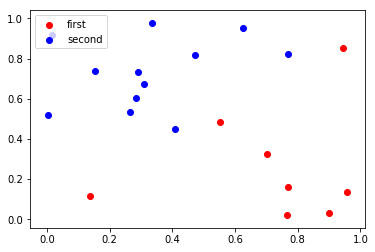

In [6]:
g1 = [[x1,x2] for [x1,x2] in x if x1>x2]
g2 = [[x1,x2] for [x1,x2] in x if x1<=x2]
plt.scatter([g[0] for g in g1],[g[1] for g in g1],color='red',label='first')
plt.scatter([g[0] for g in g2],[g[1] for g in g2],color='blue',label='second')
plt.legend(loc=2)
plt.plot

In [18]:
def predict(x,w):
    return 1 if np.dot(x,w)>0 else 0

def perceptron_sgd(X, Y):
    #print(X,Y)
    w = np.zeros(2)
    eta = 0.5
    epochs = 20

    for t in range(epochs):
        sum_loss=0
        for i,x in enumerate(X):
            y_hat = predict(x,w)
            error = Y[i]-y_hat
            w = w + eta*error*x
    return w

def perceptron_hinge(X,Y):
    w = np.zeros(2)
    eta = 0.5
    epochs = 20

    for t in range(epochs):
        for i,x in enumerate(X):
            error = 0 if (1-Y[i]*np.dot(x,w)<0) else (1-Y[i]*np.dot(x,w))
            w = w + eta*(1-error*x)
    return w

In [19]:
w1 = perceptron_sgd(x,y)
print(w1)
w2 = perceptron_hinge(x,y)
print(w2)

[  2.69142677 -66.77754574]
[ 37.61195279 -29.8278926 ]


In [49]:
np.random.seed(80)
x_test = np.random.rand(1000,2)
y_test = [1 if x_test[i][0]>x_test[i][1] else 0 for i in range(len(x_test))]

y_hat_test_1 = [predict(xi,w1) for xi in x_test]
test_err_1 = np.mean(np.array(y_hat_test_1) != np.array(y_test))

y_hat_test_2 = [predict(xi,w2) for xi in x_test]
test_err_2 = np.mean(np.array(y_hat_test_2) != np.array(y_test))
print( "Accuracy of Normal loss = ",1-test_err_1)
print( "Accuracy of Hinge Loss = ",1-test_err_2)

Accuracy of Normal loss =  0.506
Accuracy of Hinge Loss =  0.904


### 1.3

Hinge Loss has a much better performance than the perceptron loss function. 
The hinge loss function is designed to optimize on performance: When evaluating planar boundaries that separate positive points from negative points, it is irrelevant how far away from the boundary the correctly classified points are. However, misclassified points incur a penalty that is directly proportional to how far they are on the wrong side of the boundary. Thus, the optimization happens to improve accuracy, while sacrificing on density of the weight vector. 

### 1.4
Perceptron loss will have much higher consistency as the hinge loss function will have high sensitivity towards outliers (from above, and the definition of an outlier)

## Problem 2- Softmax Activation Function

### 2.1

$ 
\begin{align}
E & = -\sum_j y_j \log o_j \implies \frac{\partial E}{\partial v_k} = \sum_j y_j \frac{\partial log o_j}{\partial v_k} 
\end{align}
$

Let $ \sum_j e^{v_j} = \Omega $

Given 

$
\begin{align}
o_j & = \frac{1}{\Omega} e^{v_j} \implies \log o_j = v_j - \log \Omega \\
\implies \frac{\partial \log o_j}{\partial v_k} & = \delta_{jk} - \frac{1}{\Omega} \frac{\partial \Omega}{\partial v_k}
\end{align}
$

where $\delta_{jk}$ is the Kronecker delta- ie if $j\ne k, \delta_{jk} = 0$ and if $j = k, \delta_{jk} = 1$ Therefore,

$
\begin{align}
\frac{\partial \Omega}{\partial v_j} &= \sum_i e^{v_i} \delta_{ij} = e^{v_j} \\
\implies \frac{\partial \log o_i}{\partial v_j} &= \delta_{jj} - o_j \\
\implies \frac{\partial o_i}{\partial v_j} &= o_j(\delta_{ij} - o_j)
\end{align}
$

Thus, when $i = j, \frac{\partial o_i}{\partial v_j} = o_j(1 - o_j) $ 

and when $i \ne j, \frac{\partial o_i}{\partial v_j} = o_i(0 - o_j) = -o_i o_j$

Hence proved.

### 2.2

Following (1), 

$$ \frac{\partial E}{\partial v_i} = \sum_j y_j(o_i - \delta_{ik}) = o_i(\sum_ j y_j)-y_i. $$

For a one-hot encoded input, $\sum_i y_i = 1$

Therefore, $$ \frac{\partial E}{\partial v_i} = o_i - y_i $$